In [1]:
"""
Pyjnu-Py_Parameter_Scan.ipynb
Authors:
    -Stephan Meighen-Berger
Used to show how a parameter scan could work with this module
"""

'\nPyjnu-Py_Parameter_Scan.ipynb\nAuthors:\n    -Stephan Meighen-Berger\nUsed to show how a parameter scan could work with this module\n'

In [2]:
"""
imports external
"""
import sys
#sys.path.append("C:/Users/steph/Documents/PhD/Pyjnu-ECP/py_core/")
sys.path.append("C:/Users/steph/OneDrive/University TUM/PhD/Repositories/Pyjnu-ECP/py_core/")
import logging
import matplotlib.pyplot as plt
import csv as csv
import numpy as np

In [3]:
from pyjnu import PyRun 
from constants import phys_const

In [4]:
logging.basicConfig(level=logging.DEBUG)

In [5]:
PYJNU = PyRun(
    Bfield=0.088,
    delta=230.,
    R=0.19e15,
    d=540.,
    z=0.116,
    node_number=None
)

INFO:__builtin__.instance:Initializing the class...
INFO:__builtin__.instance:Setting user defined variables..
INFO:__builtin__.instance:Finished setting the variables.
INFO:__builtin__.instance:Creating the particle instances...
INFO:__builtin__.instance:Creating particle 11
INFO:__builtin__.instance:Finished particle 11
INFO:__builtin__.instance:Creating particle 22
INFO:__builtin__.instance:Finished particle 22
INFO:__builtin__.instance:Creating particle 22_local
INFO:__builtin__.instance:Finished particle 22_local
INFO:__builtin__.instance:Finished particle creation
INFO:__builtin__.instance:Loading the rates...
INFO:__builtin__.instance:Finished loading
INFO:__builtin__.instance:Finished initialization


In [6]:
# Multiple runs
deltas = [230.]
e_grid = {}
flux_0 = {}
flux_2 = {}
for delta in deltas:
    PYJNU.delta = delta
    PYJNU.solve_steady()
    e_grid[delta] = PYJNU.particles['22'].e_grid
    flux_0[delta] = PYJNU.particles['22'].flux['0']
    flux_2[delta] = PYJNU.particles['22'].flux['2']

INFO:__builtin__.instance:Starting steady state solving...
INFO:__builtin__.instance:Setting the geometry...
INFO:__builtin__.instance:Creating the geometry object...
INFO:__builtin__.instance:Finished creating the geometry object...
INFO:__builtin__.instance:Geometry set
INFO:__builtin__.instance:The initial electron spectrum...
INFO:__builtin__.instance:Set the initial spectrum
INFO:__builtin__.instance:Synchrotron...
INFO:__builtin__.instance:Inverse Compton...
INFO:__builtin__.instance:Case B
INFO:__builtin__.instance:Storing results...
INFO:__builtin__.instance:Finished steady state solving...
INFO:__builtin__.instance:Results stored in particle fluxes...


[]

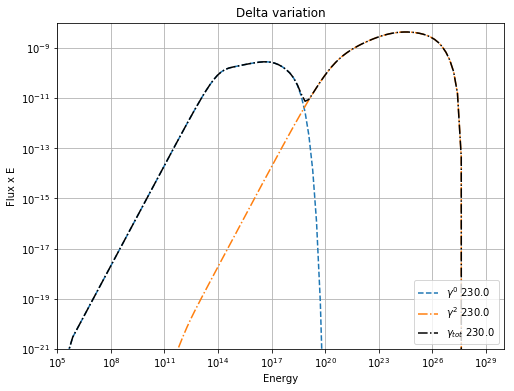

In [15]:
figure  = plt.figure(figsize=(8, 6))
for delta in deltas:
    flux1 = flux_0[delta] * e_grid[delta]
    flux2 = flux_2[delta] * e_grid[delta] * phys_const['mec2'] / phys_const['h']
    total = flux1 + flux2
    plt.plot(e_grid[delta],
             flux1,
             ls='--', label=r'$\gamma^0$ ' + str(delta))
    plt.plot(e_grid[delta],
             flux2,
             ls='-.', label=r'$\gamma^2$ ' + str(delta))
    plt.plot(e_grid[delta],
             total,
             ls='-.', label=r'$\gamma_{tot}$ ' + str(delta),
             color='k')
plt.legend(loc='lower right')
plt.grid(True)
plt.title('Delta variation')
plt.xlabel('Energy')
plt.ylabel('Flux x E')
plt.xlim(1e5, 1e30)
plt.ylim(1e-21, 1e-8)
plt.loglog()